# Similarity Analysis on Roman Amphorae

## Step 1: Business understanding

In ancient Rome, large ceramic containers called amphorae were used to transport goods like olive oil and wine. One of the most common types, Dressel 20 amphorae, was mainly used for shipping olive oil from Spain to different parts of the Roman Empire. These amphorae were produced in workshops, where craftsmen shaped and fired the clay to create standardized containers.

This study examines 413 Dressel 20 amphorae found at five different workshops.

Using data analysis and modeling to explore the shape and size of these amphorae, this project aims to uncover patterns that show whether these workshops influenced each other or operated in isolation.

Questions:
1. Are there significant differences in the dimensions (e.g., height, diameter) of Dressel 20 amphorae produced by different workshops?
2. How consistent were the dimensions of Dressel 20 amphorae produced within the same workshop?
3. There are 8 missing values in 'chronology' column. Can you predict the missing values based on the data of their dimension?

The dataset used in this project came from this paper:

Coto-Sarmiento, M., Rubio-Campillo, X., Remesal, J. (2018): Identifying social learning between Roman amphorae workshops through morphometric similarity, Journal of Archaeological Science, 96, pp. 117–123, doi: https://doi.org/10.1016/j.jas.2018.06.002

## Step 2: Data understanding

In [1]:
# import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv(r"D:\personal docs\UdacityDS\Course2\dataDressel.csv")

In [3]:
df.head()

,number,excavation,type,chronology,exterior_diam,inside_diam,rim_h,rim_w,shape_w,rim_inside_h,rim_w_2,protruding_rim,site
0,1,delicias,Dressel B,A,150,120,44,24,11,40,9,40,delicias
1,2,delicias,Dressel B,A,140,102,46,30,7,45,16,39,delicias
2,3,delicias,Dressel B,A,150,110,45,25,11,41,22,36,delicias
3,4,delicias,Dressel E,C,180,90,35,40,14,28,35,9,delicias
4,5,delicias,Dressel B,A,130,86,44,27,12,36,17,32,delicias


In [4]:
df.shape

(470, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   number          470 non-null    int64 
 1   excavation      470 non-null    object
 2   type            470 non-null    object
 3   chronology      462 non-null    object
 4   exterior_diam   470 non-null    int64 
 5   inside_diam     470 non-null    int64 
 6   rim_h           470 non-null    int64 
 7   rim_w           470 non-null    int64 
 8   shape_w         470 non-null    int64 
 9   rim_inside_h    470 non-null    int64 
 10  rim_w_2         470 non-null    int64 
 11  protruding_rim  470 non-null    int64 
 12  site            470 non-null    object
dtypes: int64(9), object(4)
memory usage: 47.9+ KB


In [6]:
for col in df.select_dtypes(exclude=int):
    print(f'Column {col} contains {df[col].value_counts()}')

Column excavation contains excavation
delicias      128
malpica       111
belen          89
parlamento     84
villaseca      58
Name: count, dtype: int64
Column type contains type
Dressel D     198
Dressel E     172
Dressel C      55
Dressel B      24
Dressel G      14
Dressel 23      7
Name: count, dtype: int64
Column chronology contains chronology
B      198
C      185
A-B     55
A       24
Name: count, dtype: int64
Column site contains site
delicias      128
malpica       111
belen          89
parlamento     84
villaseca      58
Name: count, dtype: int64


In [7]:
check_equal = df['excavation'].equals(df['site'])
print(check_equal)

True


In [8]:
df.describe()

,number,exterior_diam,inside_diam,rim_h,rim_w,shape_w,rim_inside_h,rim_w_2,protruding_rim
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,50.548936,166.889362,94.474468,35.391489,36.293617,9.512766,28.380851,30.348936,18.889362
std,31.830520,12.840189,10.050108,3.583296,4.758895,1.358401,3.564462,5.376006,6.608815
min,1.000000,120.000000,70.000000,25.000000,15.000000,5.000000,18.000000,7.000000,5.000000
25%,24.000000,160.000000,90.000000,34.000000,34.000000,9.000000,26.000000,28.000000,14.000000
50%,47.500000,170.000000,90.000000,35.000000,37.000000,10.000000,28.000000,31.000000,18.000000
75%,74.000000,175.000000,100.000000,37.000000,40.000000,10.000000,30.000000,34.000000,23.000000
max,128.000000,210.000000,140.000000,56.000000,48.000000,14.000000,45.000000,44.000000,42.000000


In [9]:
df.isna().sum().sort_values(ascending=False)

chronology        8
number            0
excavation        0
type              0
exterior_diam     0
inside_diam       0
rim_h             0
rim_w             0
shape_w           0
rim_inside_h      0
rim_w_2           0
protruding_rim    0
site              0
dtype: int64

### Basic understanding

Column 'number' is the ID for each Dressel 20 vessel discovered among 5 sites (delicias, malpica, belen, parlamento, and villaseca), so the data type should be `str`. However, since this column serves as ID column instead of feature, it can be dropped in feature selection.

Column 'excavation' has exact alignment with column 'site', which means all vessels were discovered where they were made. For feature selection, one of them can be dropped.

There are 8 missing values at column 'chronology' in the dataset.taset.set.

### Univariate analysis

In [10]:
num_features = df.select_dtypes(include='int').columns.to_list()
cat_features = [col for col in df.columns if (col != 'number') and (col not in num_features)]
print(f'Numerical features include {num_features}')
print(f'Categorical features include {cat_features}')

Numerical features include ['number', 'exterior_diam', 'inside_diam', 'rim_h', 'rim_w', 'shape_w', 'rim_inside_h', 'rim_w_2', 'protruding_rim']
Categorical features include ['excavation', 'type', 'chronology', 'site']


### Q1: Are there significant differences in the dimensions (e.g., height, diameter) of Dressel 20 amphorae produced by different workshops?

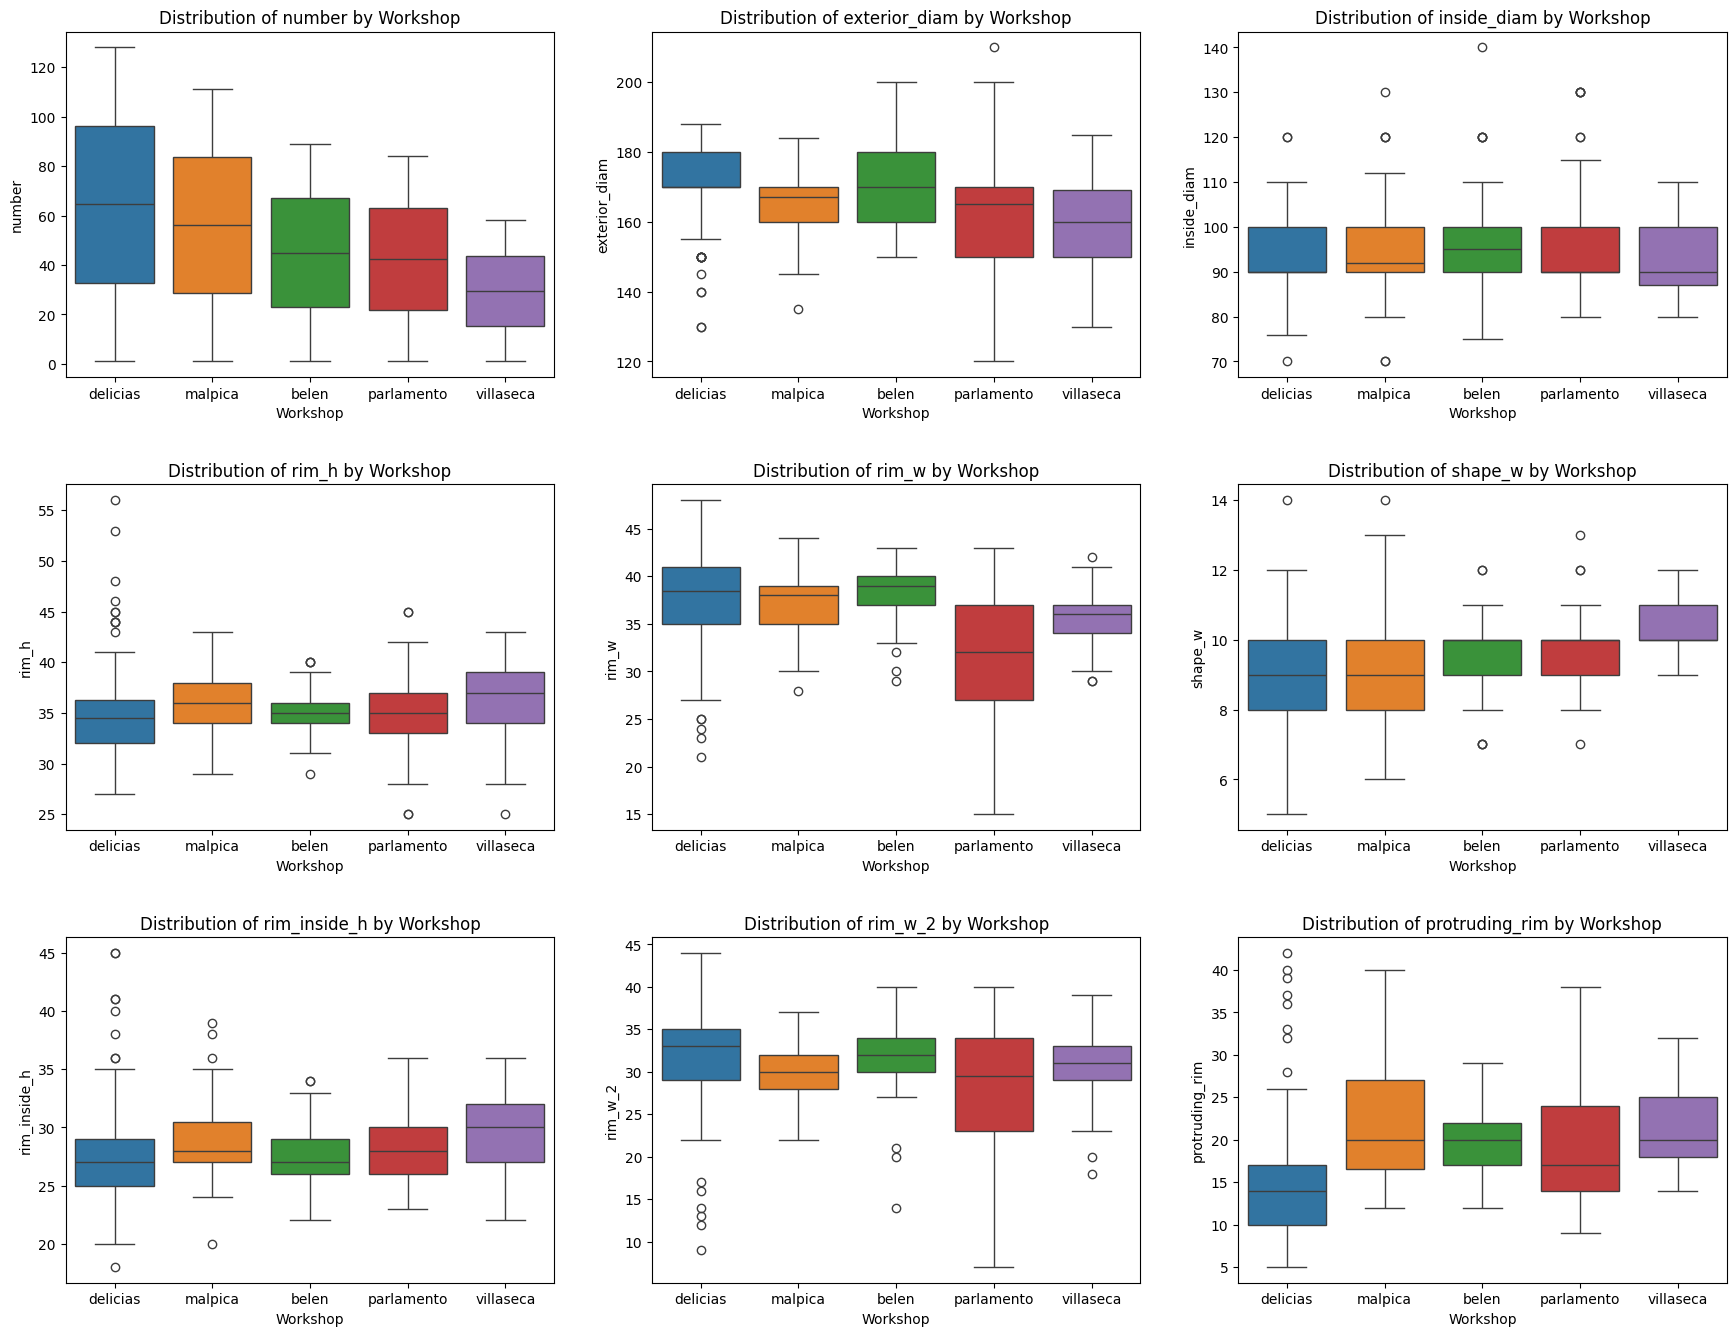

In [11]:
plt.figure(figsize=(18, 14))

for i, dimension in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='site', y=dimension, data=df, hue='site', legend=False)
    plt.title(f'Distribution of {dimension} by Workshop')
    plt.xlabel('Workshop')
    plt.ylabel(dimension)

plt.tight_layout(pad=3.0)
plt.show()

### Q2: How consistent were the dimensions of Dressel 20 amphorae produced within the same workshop?

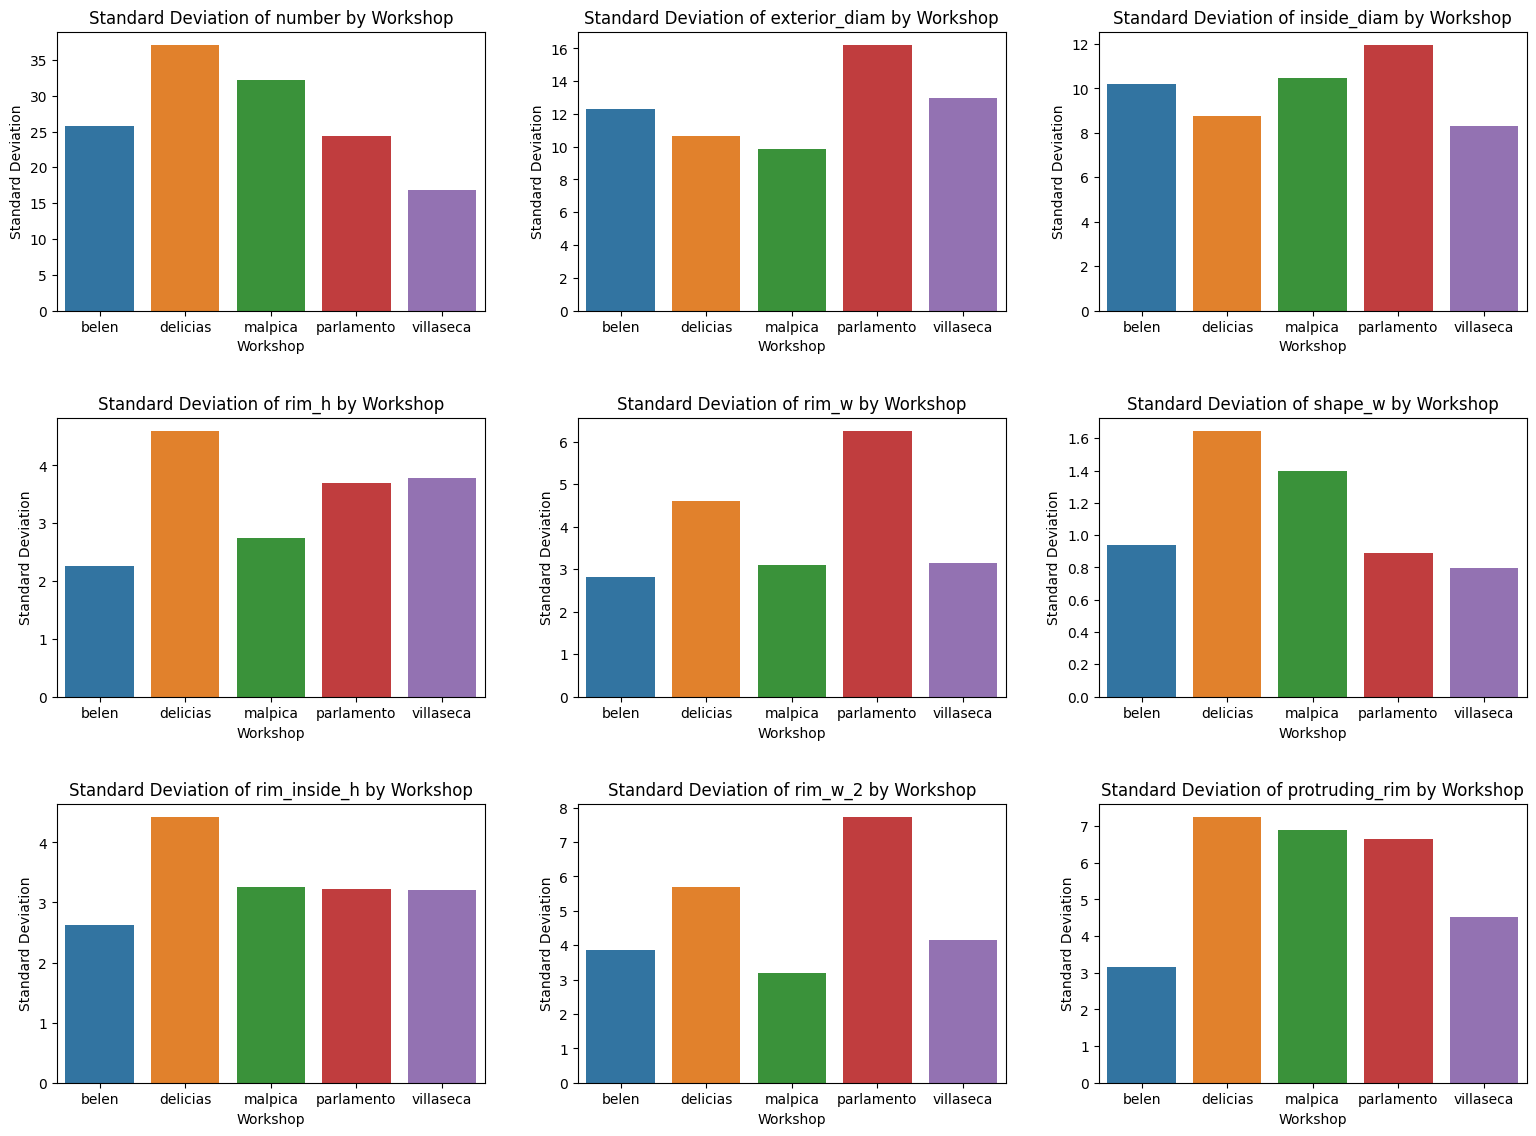

In [12]:
std_df = df.groupby('site')[num_features].std().reset_index()

plt.figure(figsize=(16, 12))

for i, dimension in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x='site', y=dimension, data=std_df, hue='site', legend=False)
    plt.title(f'Standard Deviation of {dimension} by Workshop')
    plt.xlabel('Workshop')
    plt.ylabel('Standard Deviation')

plt.tight_layout(pad=3.0)
plt.show()

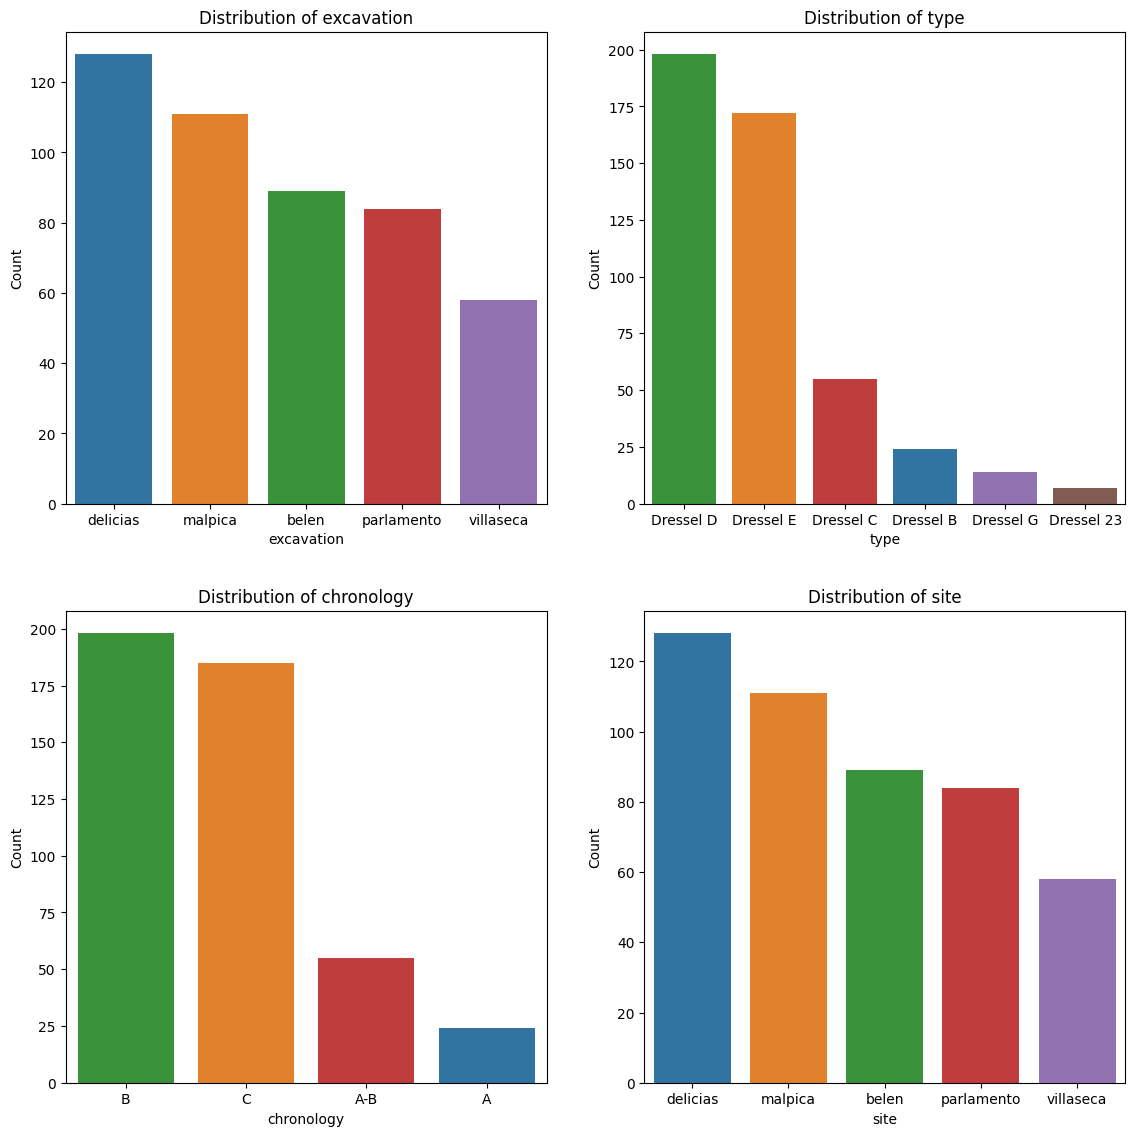

In [13]:
plt.figure(figsize=(12, 12))


for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, order=df[col].value_counts().index, hue=col, data=df, legend=False)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")

plt.tight_layout(pad=3.0)
plt.show()

### Bivariate analysis

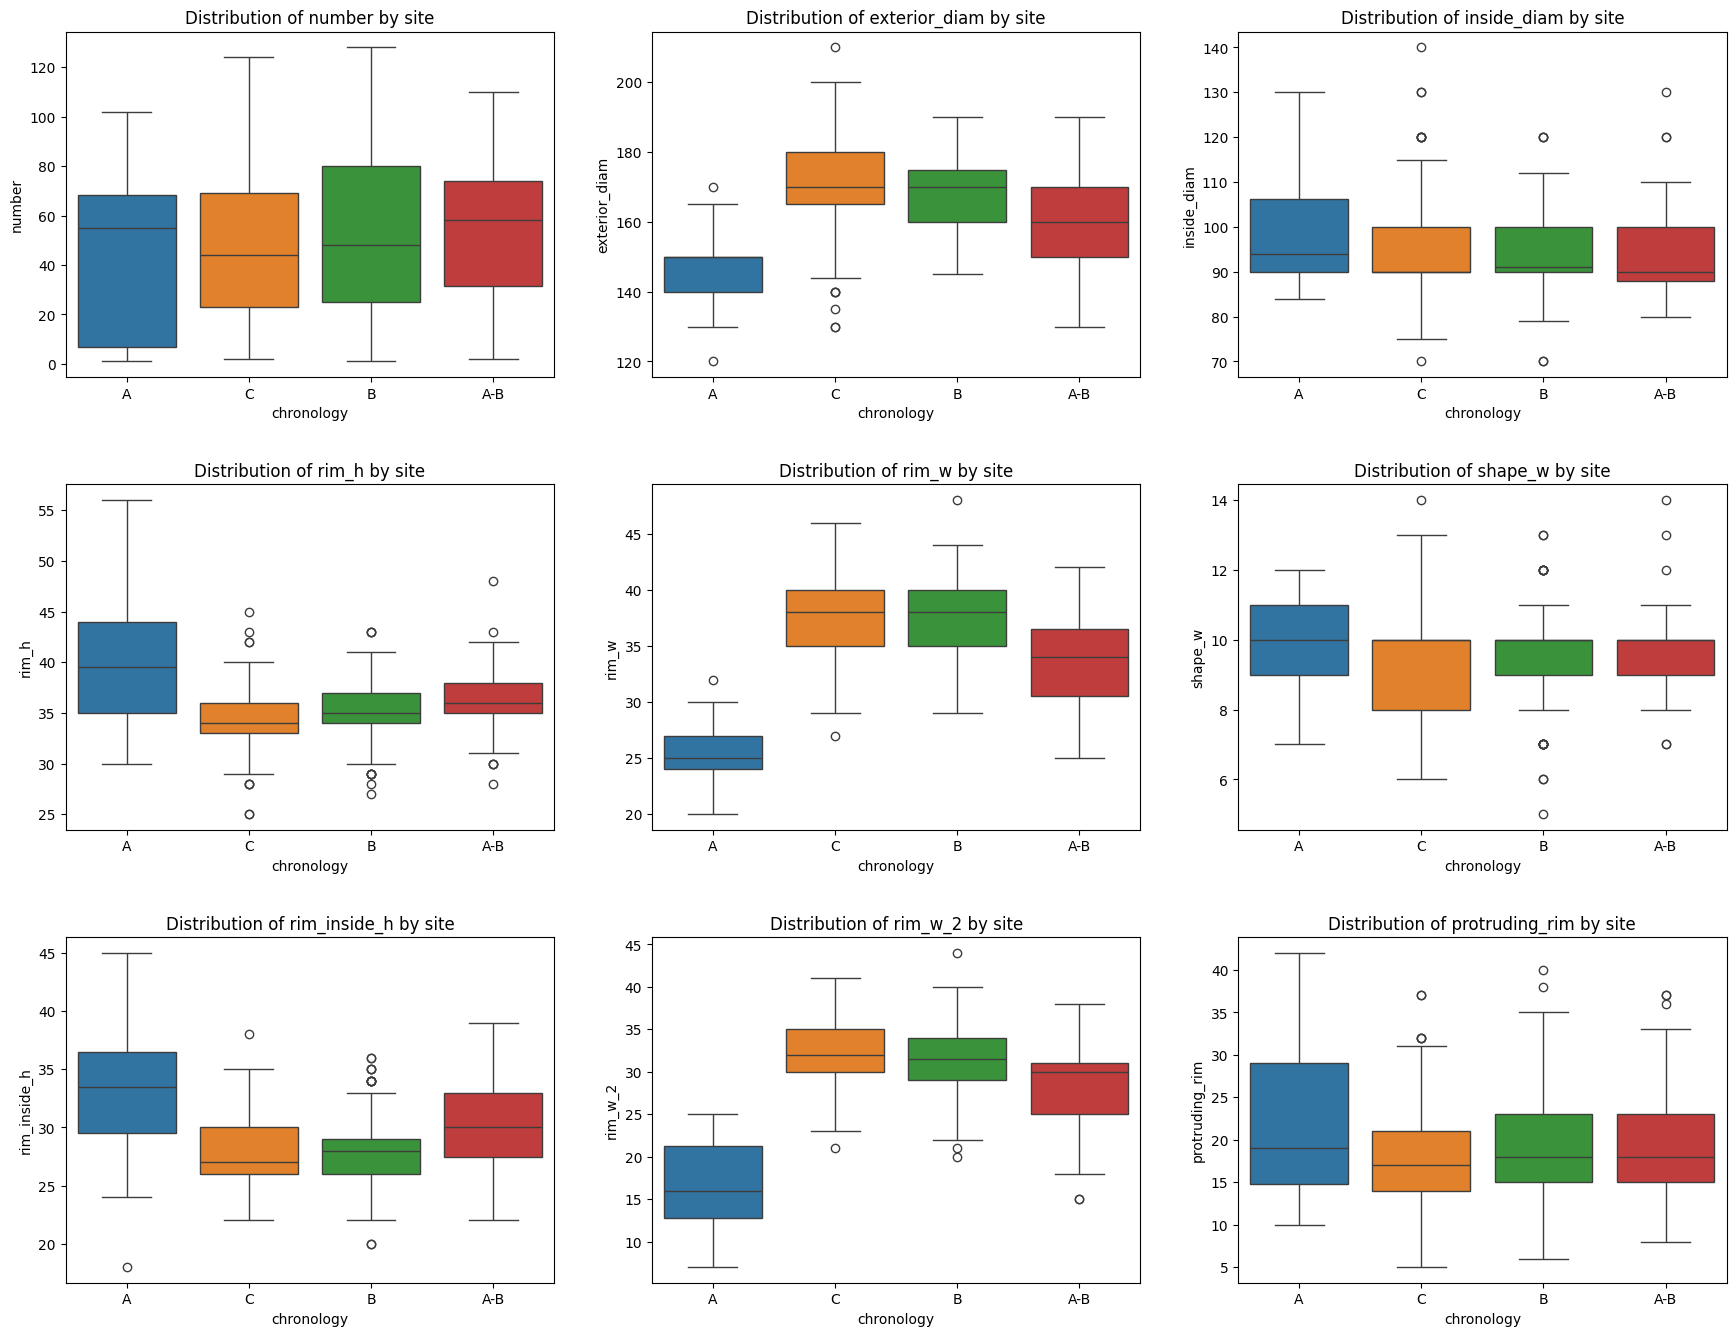

In [14]:
plt.figure(figsize=(18, 14))

for i, dimension in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='chronology', y=dimension, data=df, hue='chronology', legend=False)
    plt.title(f"Distribution of {dimension} by site")

plt.tight_layout(pad=3.0)
plt.show()

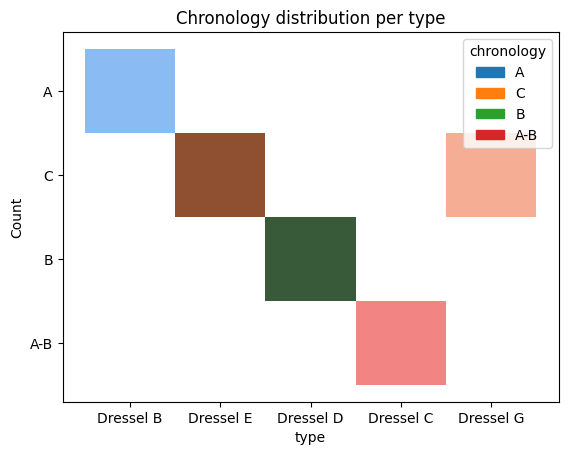

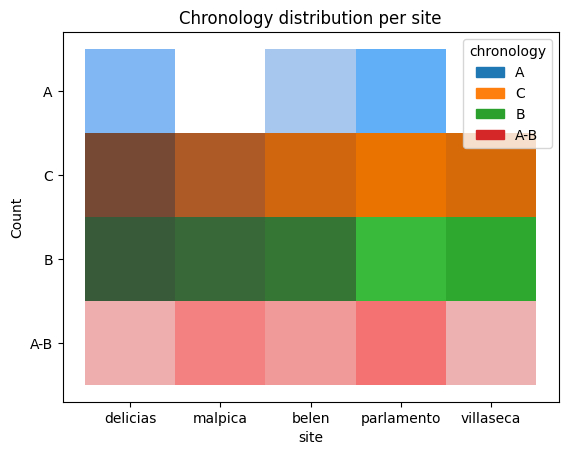

In [15]:
for col in cat_features:
    if col != 'excavation' and col != 'chronology':
        sns.histplot(data=df, x=col, y='chronology', hue='chronology', shrink=0.8)
        plt.title(f"Chronology distribution per {col}")
        plt.ylabel("Count")
        plt.show()

### Multivariate analysis

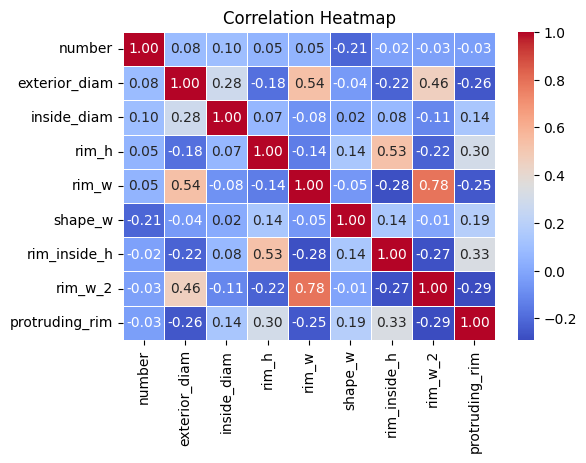

In [16]:
corr_matrix = df[num_features].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Step 3: Data preparation

In [17]:
# encoding site and type
df = pd.get_dummies(df, columns=['site', 'type'])

In [18]:
missing_chronology_df = df[df['chronology'].isna()]

missing_chronology_df

,number,excavation,chronology,exterior_diam,inside_diam,rim_h,rim_w,shape_w,rim_inside_h,rim_w_2,...,site_delicias,site_malpica,site_parlamento,site_villaseca,type_Dressel 23,type_Dressel B,type_Dressel C,type_Dressel D,type_Dressel E,type_Dressel G
329,2,parlamento,NaN,155,85,37,29,11,27,26,...,False,False,True,False,False,False,False,False,False,True
333,6,parlamento,NaN,170,113,35,31,8,26,26,...,False,False,True,False,True,False,False,False,False,False
334,7,parlamento,NaN,167,105,30,29,9,26,25,...,False,False,True,False,True,False,False,False,False,False
339,12,parlamento,NaN,150,90,33,15,10,28,30,...,False,False,True,False,True,False,False,False,False,False
353,26,parlamento,NaN,155,100,25,22,9,25,25,...,False,False,True,False,True,False,False,False,False,False
354,27,parlamento,NaN,165,115,45,29,10,28,23,...,False,False,True,False,True,False,False,False,False,False
355,28,parlamento,NaN,160,100,35,20,8,30,15,...,False,False,True,False,True,False,False,False,False,False
396,69,parlamento,NaN,200,130,28,28,7,26,26,...,False,False,True,False,True,False,False,False,False,False


In [19]:
df = df.dropna(subset=['chronology'])

df.isna().sum()

number             0
excavation         0
chronology         0
exterior_diam      0
inside_diam        0
rim_h              0
rim_w              0
shape_w            0
rim_inside_h       0
rim_w_2            0
protruding_rim     0
site_belen         0
site_delicias      0
site_malpica       0
site_parlamento    0
site_villaseca     0
type_Dressel 23    0
type_Dressel B     0
type_Dressel C     0
type_Dressel D     0
type_Dressel E     0
type_Dressel G     0
dtype: int64

In [20]:
# encoding chronology using OrdinalEncoder

chronology_order = [['A', 'A-B', 'B', 'C']]
ordinal_encoder = OrdinalEncoder(categories=chronology_order)
df['chronology_encoded'] = ordinal_encoder.fit_transform(df[['chronology']])

In [21]:
df.columns

Index(['number', 'excavation', 'chronology', 'exterior_diam', 'inside_diam',
       'rim_h', 'rim_w', 'shape_w', 'rim_inside_h', 'rim_w_2',
       'protruding_rim', 'site_belen', 'site_delicias', 'site_malpica',
       'site_parlamento', 'site_villaseca', 'type_Dressel 23',
       'type_Dressel B', 'type_Dressel C', 'type_Dressel D', 'type_Dressel E',
       'type_Dressel G', 'chronology_encoded'],
      dtype='object')

In [22]:
# feature selection

df_model = df.drop(['excavation', 'number'], axis=1)

In [23]:
df_model.columns

Index(['chronology', 'exterior_diam', 'inside_diam', 'rim_h', 'rim_w',
       'shape_w', 'rim_inside_h', 'rim_w_2', 'protruding_rim', 'site_belen',
       'site_delicias', 'site_malpica', 'site_parlamento', 'site_villaseca',
       'type_Dressel 23', 'type_Dressel B', 'type_Dressel C', 'type_Dressel D',
       'type_Dressel E', 'type_Dressel G', 'chronology_encoded'],
      dtype='object')

## Step 4: Modeling

In [24]:
X = df_model.drop(['chronology', 'chronology_encoded'], axis=1).copy()
y = df_model['chronology'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
param_grid = {
    'n_estimators': np.arange(100, 501, 100),  # 100, 200, 300, 400, 500
    'max_depth': np.arange(10, 51, 10),         # 10, 20, 30, 40, 50
    'min_samples_split': np.arange(2, 11, 2),   # 2, 4, 6, 8, 10
    'min_samples_leaf': np.arange(1, 11, 2)     # 1, 3, 5, 7, 9
}

rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,        # 3-fold cross-validation
                           n_jobs=-1,   # Use all available CPU cores
                           verbose=2)   # Print progress

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Fitting 3 folds for each of 625 candidates, totalling 1875 fits
Best Parameters: {'max_depth': np.int64(10), 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2), 'n_estimators': np.int64(100)}


## Step 5: Evaluation

In [26]:
# Predictions using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         6
         A-B       1.00      1.00      1.00        17
           B       1.00      1.00      1.00        58
           C       1.00      1.00      1.00        58

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



In [27]:
feature_importances_best = best_model.feature_importances_

importance_df_best = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_best
})

importance_df_best = importance_df_best.sort_values(by='Importance', ascending=False)
print(importance_df_best)

            Feature  Importance
16   type_Dressel D    0.329877
17   type_Dressel E    0.309101
15   type_Dressel C    0.148635
14   type_Dressel B    0.043654
3             rim_w    0.038470
6           rim_w_2    0.030595
5      rim_inside_h    0.019463
0     exterior_diam    0.016930
18   type_Dressel G    0.015476
7    protruding_rim    0.011107
2             rim_h    0.010823
1       inside_diam    0.009186
11  site_parlamento    0.008016
4           shape_w    0.004014
9     site_delicias    0.001483
12   site_villaseca    0.001422
8        site_belen    0.000903
10     site_malpica    0.000843
13  type_Dressel 23    0.000000


### Q3: There are 8 missing values in 'chronology' column. Can you predict the missing values based on the data of their dimension?

In [28]:
X_missing = missing_chronology_df.drop(columns=['chronology', 'number', 'excavation']).copy()

In [29]:
X_missing.columns

Index(['exterior_diam', 'inside_diam', 'rim_h', 'rim_w', 'shape_w',
       'rim_inside_h', 'rim_w_2', 'protruding_rim', 'site_belen',
       'site_delicias', 'site_malpica', 'site_parlamento', 'site_villaseca',
       'type_Dressel 23', 'type_Dressel B', 'type_Dressel C', 'type_Dressel D',
       'type_Dressel E', 'type_Dressel G'],
      dtype='object')

In [30]:
chronology_pred = best_model.predict(X_missing)

In [31]:
missing_chronology_df['chronology'] = chronology_pred

In [32]:
missing_chronology_df

,number,excavation,chronology,exterior_diam,inside_diam,rim_h,rim_w,shape_w,rim_inside_h,rim_w_2,...,site_delicias,site_malpica,site_parlamento,site_villaseca,type_Dressel 23,type_Dressel B,type_Dressel C,type_Dressel D,type_Dressel E,type_Dressel G
329,2,parlamento,C,155,85,37,29,11,27,26,...,False,False,True,False,False,False,False,False,False,True
333,6,parlamento,C,170,113,35,31,8,26,26,...,False,False,True,False,True,False,False,False,False,False
334,7,parlamento,C,167,105,30,29,9,26,25,...,False,False,True,False,True,False,False,False,False,False
339,12,parlamento,C,150,90,33,15,10,28,30,...,False,False,True,False,True,False,False,False,False,False
353,26,parlamento,A,155,100,25,22,9,25,25,...,False,False,True,False,True,False,False,False,False,False
354,27,parlamento,C,165,115,45,29,10,28,23,...,False,False,True,False,True,False,False,False,False,False
355,28,parlamento,A,160,100,35,20,8,30,15,...,False,False,True,False,True,False,False,False,False,False
396,69,parlamento,C,200,130,28,28,7,26,26,...,False,False,True,False,True,False,False,False,False,False
